In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import pylab as pl
import seaborn as sns
plt.style.use(['ggplot','seaborn-paper'])
from time import process_time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer
from sklearn.metrics import precision_recall_fscore_support
from sklearn import metrics

In [2]:
def log_reg(param_grid, X_train, y_train, X_test, y_test):
    clf_log_reg = GridSearchCV(LogisticRegression(solver= 'liblinear'), param_grid=param_grid_log_reg, 
                               verbose=0,return_train_score=True, n_jobs=-1, cv=5, iid = False) 
#    t_start = process_time()
#    for i in range(n):
    clf_log_reg.fit(X_train, y_train)
#    t_stop = process_time()
#    t_log_reg = (t_stop-t_start)/n   
    
    #cv_results = pd.DataFrame(clf_log_reg.cv_results_)
    #scores = clf_log_reg.cv_results_['mean_test_score'].reshape(len(param_grid_log_reg['C']))
    #print('Best Params:',clf_log_reg.best_params_, '\n')
    y_pred_log_reg = clf_log_reg.predict(X_test)
    #print(classification_report(y_test,y_pred_log_reg))
    #print(confusion_matrix(y_test,y_pred_log_reg))
    #return clf_log_reg.best_params_, classification_report(y_test,y_pred_log_reg), f1_score(y_test,y_pred_log_reg, average='weighted')#, t_log_reg
    score_micro = precision_recall_fscore_support(y_test, y_pred_log_reg, average='micro')
    score_macro = precision_recall_fscore_support(y_test, y_pred_log_reg, average='macro')
    score_weighted = precision_recall_fscore_support(y_test, y_pred_log_reg, average='weighted')
    
    return score_micro[0], score_micro[1], score_micro[2], score_macro[0], score_macro[1], score_macro[2], score_weighted[0], score_weighted[1], score_weighted[2]

In [3]:
def SVM_rbf_clf(param_grid, X_train, y_train, X_test, y_test):
    clf_svm_rbf = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, verbose=0, iid = False,
                               return_train_score=True, cv=5)
#    t_start = process_time()
#    for i in range(n):
    clf_svm_rbf.fit(X_train, y_train)
#    t_stop = process_time()
#    t_svc = (t_stop-t_start)/n
    
    #cv_results_svm_rbf = pd.DataFrame(clf_svm_rbf.cv_results_)
    #scores_svm_rbf = clf_svm_rbf.cv_results_['mean_test_score'].reshape(len(param_grid_svm_rbf['C']),
    #                                                                    len(param_grid_svm_rbf['gamma'])) 
    #heat_map_2d('gamma', 'C', param_grid_svm_rbf, scores_svm_rbf, v_min, v_mid, v_max, path)
    #print('Best Params:',clf_svm_rbf.best_params_, '\n')
    y_pred_svm_rbf = clf_svm_rbf.predict(X_test)
    #print(classification_report(y_test,y_pred_svm_rbf))
    #print(confusion_matrix(y_test,y_pred_svm_rbf))
    #return clf_svm_rbf.best_params_, classification_report(y_test,y_pred_svm_rbf)#, t_svc
    score_micro = precision_recall_fscore_support(y_test, y_pred_svm_rbf, average='micro')
    score_macro = precision_recall_fscore_support(y_test, y_pred_svm_rbf, average='macro')
    score_weighted = precision_recall_fscore_support(y_test, y_pred_svm_rbf, average='weighted')
    return score_micro[0], score_micro[1], score_micro[2], score_macro[0], score_macro[1], score_macro[2], score_weighted[0], score_weighted[1], score_weighted[2]

In [18]:
def random_forests_clf(param_grid, X_train, y_train, X_test, y_test):
    clf_rf = GridSearchCV(RandomForestClassifier(random_state=42, n_jobs=-1), param_grid=param_grid_rf, verbose=0, iid = False,
                          return_train_score=True, n_jobs=-1, cv=5)
#    t_start = process_time()
#    for i in range(n):
    clf_rf.fit(X_train, y_train)
#    t_stop = process_time()
#    t_rf = (t_stop-t_start)/n
#    cv_results_rf = pd.DataFrame(clf_rf.cv_results_)
#    scores_rf = clf_rf.cv_results_['mean_test_score'].reshape(len(param_grid_rf['n_estimators']),
#                                                              len(param_grid_rf['max_features'])) 
#    heat_map_2d('n_estimators', 'max_features', param_grid_rf, scores_rf, v_min, v_mid, v_max, path)
#    print('Best Params:', clf_rf.best_params_, '\n')
    y_pred_rf = clf_rf.predict(X_test)
#    print(classification_report(y_test,y_pred_rf))
#    print(confusion_matrix(y_test,y_pred_rf))
#    return clf_rf.best_params_, classification_report(y_test,y_pred_rf)#, t_rf
    score_micro = precision_recall_fscore_support(y_test, y_pred_rf, average='micro')
    score_macro = precision_recall_fscore_support(y_test, y_pred_rf, average='macro')
    score_weighted = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
    return score_micro[0], score_micro[1], score_micro[2], score_macro[0], score_macro[1], score_macro[2], score_weighted[0], score_weighted[1], score_weighted[2]

In [5]:
def mlp_clf(param_grid, X_train, y_train, X_test, y_test):
    clf_mlp = GridSearchCV(MLPClassifier(random_state=42), param_grid=param_grid_mlp, verbose=0, iid = False,
                           return_train_score=True, n_jobs=-1, cv=5)
#    t_start = process_time()
#    for i in range(n):
    clf_mlp.fit(X_train, y_train)
#    t_stop = process_time()
#    t_mlp = (t_stop-t_start)/n
    #cv_results_mlp = pd.DataFrame(clf_mlp.cv_results_)
    #scores_mlp = clf_mlp.cv_results_['mean_test_score'].reshape(len(param_grid_mlp['alpha']),
    #                                                      len(param_grid_mlp['hidden_layer_sizes'])) 
    #heat_map_2d('alpha', 'hidden_layer_sizes', param_grid_mlp, scores_mlp, v_min, v_mid, v_max, path)
    #print('Best Params:', clf_mlp.best_params_, '\n') 
    y_pred_mlp = clf_mlp.predict(X_test)
    #print(classification_report(y_test,y_pred_mlp))
    #print(confusion_matrix(y_test,y_pred_mlp))
    #return clf_mlp.best_params_, classification_report(y_test,y_pred_mlp)#, t_mlp
    score_micro = precision_recall_fscore_support(y_test, y_pred_mlp, average='micro')
    score_macro = precision_recall_fscore_support(y_test, y_pred_mlp, average='macro')
    score_weighted = precision_recall_fscore_support(y_test, y_pred_mlp, average='weighted')
    return score_micro[0], score_micro[1], score_micro[2], score_macro[0], score_macro[1], score_macro[2], score_weighted[0], score_weighted[1], score_weighted[2]

In [6]:
X_train_low_07 = np.load('./data_augmentation/X_train_low_07.npy')
X_test_low_07 = np.load('./data_augmentation/X_test_low_07.npy')
y_train_low_07 = np.load('./data_augmentation/y_train_low_07.npy')
y_test_low_07 = np.load('./data_augmentation/y_test_low_07.npy')

X_train_med_07 = np.load('./data_augmentation/X_train_med_07.npy')
X_test_med_07 = np.load('./data_augmentation/X_test_med_07.npy')
y_train_med_07 = np.load('./data_augmentation/y_train_med_07.npy')
y_test_med_07 = np.load('./data_augmentation/y_test_med_07.npy')

X_train_high_07 = np.load('./data_augmentation/X_train_high_07.npy')
X_test_high_07 = np.load('./data_augmentation/X_test_high_07.npy')
y_train_high_07 = np.load('./data_augmentation/y_train_high_07.npy')
y_test_high_07 = np.load('./data_augmentation/y_test_high_07.npy')

In [7]:
X_train_low_04 = np.load('./data_augmentation/X_train_low_04.npy')
X_test_low_04 = np.load('./data_augmentation/X_test_low_04.npy')
y_train_low_04 = np.load('./data_augmentation/y_train_low_04.npy')
y_test_low_04 = np.load('./data_augmentation/y_test_low_04.npy')

X_train_med_04 = np.load('./data_augmentation/X_train_med_04.npy')
X_test_med_04 = np.load('./data_augmentation/X_test_med_04.npy')
y_train_med_04 = np.load('./data_augmentation/y_train_med_04.npy')
y_test_med_04 = np.load('./data_augmentation/y_test_med_04.npy')

X_train_high_04 = np.load('./data_augmentation/X_train_high_04.npy')
X_test_high_04 = np.load('./data_augmentation/X_test_high_04.npy')
y_train_high_04 = np.load('./data_augmentation/y_train_high_04.npy')
y_test_high_04 = np.load('./data_augmentation/y_test_high_04.npy')

In [8]:
X_train_low_01 = np.load('./data_augmentation/X_train_low_01.npy')
X_test_low_01 = np.load('./data_augmentation/X_test_low_01.npy')
y_train_low_01 = np.load('./data_augmentation/y_train_low_01.npy')
y_test_low_01 = np.load('./data_augmentation/y_test_low_01.npy')

X_train_med_01 = np.load('./data_augmentation/X_train_med_01.npy')
X_test_med_01 = np.load('./data_augmentation/X_test_med_01.npy')
y_train_med_01 = np.load('./data_augmentation/y_train_med_01.npy')
y_test_med_01 = np.load('./data_augmentation/y_test_med_01.npy')

X_train_high_01 = np.load('./data_augmentation/X_train_high_01.npy')
X_test_high_01 = np.load('./data_augmentation/X_test_high_01.npy')
y_train_high_01 = np.load('./data_augmentation/y_train_high_01.npy')
y_test_high_01 = np.load('./data_augmentation/y_test_high_01.npy')

In [9]:
X_train_low_cl = np.load('./data_augmentation/X_train_low.npy')
X_test_low_cl = np.load('./data_augmentation/X_test_low.npy')
y_train_low_cl = np.load('./data_augmentation/y_train_low.npy')
y_test_low_cl = np.load('./data_augmentation/y_test_low.npy')

X_train_med_cl = np.load('./data_augmentation/X_train_med.npy')
X_test_med_cl = np.load('./data_augmentation/X_test_med.npy')
y_train_med_cl = np.load('./data_augmentation/y_train_med.npy')
y_test_med_cl = np.load('./data_augmentation/y_test_med.npy')

X_train_high_cl = np.load('./data_augmentation/X_train_high.npy')
X_test_high_cl = np.load('./data_augmentation/X_test_high.npy')
y_train_high_cl = np.load('./data_augmentation/y_train_high.npy')
y_test_high_cl = np.load('./data_augmentation/y_test_high.npy')

In [10]:
X_train_low = np.load('./results/X_train_low.npy')
X_test_low = np.load('./results/X_test_low.npy')
y_train_low = np.load('./results/y_train_low.npy')
y_test_low = np.load('./results/y_test_low.npy')

X_train_med = np.load('./results/X_train_med.npy')
X_test_med = np.load('./results/X_test_med.npy')
y_train_med = np.load('./results/y_train_med.npy')
y_test_med = np.load('./results/y_test_med.npy')

X_train_high = np.load('./results/X_train_high.npy')
X_test_high = np.load('./results/X_test_high.npy')
y_train_high = np.load('./results/y_train_high.npy')
y_test_high = np.load('./results/y_test_high.npy')

In [11]:
X_train_low_aug = np.concatenate((X_train_low_cl,X_train_low_01))
X_train_low_aug = np.concatenate((X_train_low_aug,X_train_low_04))
X_train_low_aug = np.concatenate((X_train_low_aug,X_train_low_07))

y_train_low_aug = np.concatenate((y_train_low_cl,y_train_low_01))
y_train_low_aug = np.concatenate((y_train_low_aug,y_train_low_04))
y_train_low_aug = np.concatenate((y_train_low_aug,y_train_low_07))

In [12]:
X_train_med_aug = np.concatenate((X_train_med_cl,X_train_med_01))
X_train_med_aug = np.concatenate((X_train_med_aug,X_train_med_04))
X_train_med_aug = np.concatenate((X_train_med_aug,X_train_med_07))

y_train_med_aug = np.concatenate((y_train_med_cl,y_train_med_01))
y_train_med_aug = np.concatenate((y_train_med_aug,y_train_med_04))
y_train_med_aug = np.concatenate((y_train_med_aug,y_train_med_07))

In [13]:
X_train_high_aug = np.concatenate((X_train_high_cl,X_train_high_01))
X_train_high_aug = np.concatenate((X_train_high_aug,X_train_high_04))
X_train_high_aug = np.concatenate((X_train_high_aug,X_train_high_07))

y_train_high_aug = np.concatenate((y_train_high_cl,y_train_high_01))
y_train_high_aug = np.concatenate((y_train_high_aug,y_train_high_04))
y_train_high_aug = np.concatenate((y_train_high_aug,y_train_high_07))

In [14]:
step = 15

In [15]:
grid_log_reg = [i for i in range(1, 11, 1)]
param_grid_log_reg = {'C': [np.round((0.1*i), decimals =2) for i in grid_log_reg]}
print('Parameters:', param_grid_log_reg)

Parameters: {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


In [16]:
Precision_micro_low_LR = np.array([])
Precision_macro_low_LR = np.array([])
Precision_weighted_low_LR = np.array([])

Recall_micro_low_LR = np.array([])
Recall_macro_low_LR = np.array([])
Recall_weighted_low_LR = np.array([])

F1_micro_low_LR = np.array([])
F1_macro_low_LR = np.array([])
F1_weighted_low_LR = np.array([])
Sample_Num_low_LR = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = log_reg(param_grid_log_reg, X_train_low_aug[:i], y_train_low_aug[:i].astype(int), X_test_low, y_test_low)
       
    Precision_micro_low_LR = np.append(Precision_micro_low_LR, pr_micro)
    Precision_macro_low_LR = np.append(Precision_macro_low_LR, pr_macro)
    Precision_weighted_low_LR = np.append(Precision_weighted_low_LR, pr_weighted)    
    
    Recall_micro_low_LR = np.append(Recall_micro_low_LR, re_micro)
    Recall_macro_low_LR = np.append(Recall_macro_low_LR, re_macro)
    Recall_weighted_low_LR = np.append(Recall_weighted_low_LR, re_weighted)    
    
    F1_micro_low_LR = np.append(F1_micro_low_LR, f1_micro)
    F1_macro_low_LR = np.append(F1_macro_low_LR, f1_macro)
    F1_weighted_low_LR = np.append(F1_weighted_low_LR, f1_weighted)
    
    Sample_Num_low_LR = np.append(Sample_Num_low_LR, len(y_train_low_aug[:i]))

In [17]:
df_plot_low_LR = pd.DataFrame()
df_plot_low_LR['Sample Number'] = Sample_Num_low_LR

df_plot_low_LR['Precision Micro'] = Precision_micro_low_LR
df_plot_low_LR['Precision Macro'] = Precision_macro_low_LR
df_plot_low_LR['Precision Weighted'] = Precision_weighted_low_LR

df_plot_low_LR['Recall Micro'] = Recall_micro_low_LR
df_plot_low_LR['Recall Macro'] = Recall_macro_low_LR
df_plot_low_LR['Recall Weighted'] = Recall_weighted_low_LR

df_plot_low_LR['F1 Micro'] = F1_micro_low_LR
df_plot_low_LR['F1 Macro'] = F1_macro_low_LR
df_plot_low_LR['F1 Weighted'] = F1_weighted_low_LR

df_plot_low_LR['Resolution'] = 'Low'

In [18]:
Precision_micro_med_LR = np.array([])
Precision_macro_med_LR = np.array([])
Precision_weighted_med_LR = np.array([])

Recall_micro_med_LR = np.array([])
Recall_macro_med_LR = np.array([])
Recall_weighted_med_LR = np.array([])

F1_micro_med_LR = np.array([])
F1_macro_med_LR = np.array([])
F1_weighted_med_LR = np.array([])
Sample_Num_med_LR = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = log_reg(param_grid_log_reg, X_train_med_aug[:i], y_train_med_aug[:i].astype(int), X_test_med, y_test_med)
       
    Precision_micro_med_LR = np.append(Precision_micro_med_LR, pr_micro)
    Precision_macro_med_LR = np.append(Precision_macro_med_LR, pr_macro)
    Precision_weighted_med_LR = np.append(Precision_weighted_med_LR, pr_weighted)    
    
    Recall_micro_med_LR = np.append(Recall_micro_med_LR, re_micro)
    Recall_macro_med_LR = np.append(Recall_macro_med_LR, re_macro)
    Recall_weighted_med_LR = np.append(Recall_weighted_med_LR, re_weighted)    
    
    F1_micro_med_LR = np.append(F1_micro_med_LR, f1_micro)
    F1_macro_med_LR = np.append(F1_macro_med_LR, f1_macro)
    F1_weighted_med_LR = np.append(F1_weighted_med_LR, f1_weighted)
    
    Sample_Num_med_LR = np.append(Sample_Num_med_LR, len(y_train_med_aug[:i]))

In [19]:
df_plot_med_LR = pd.DataFrame()
df_plot_med_LR['Sample Number'] = Sample_Num_med_LR

df_plot_med_LR['Precision Micro'] = Precision_micro_med_LR
df_plot_med_LR['Precision Macro'] = Precision_macro_med_LR
df_plot_med_LR['Precision Weighted'] = Precision_weighted_med_LR

df_plot_med_LR['Recall Micro'] = Recall_micro_med_LR
df_plot_med_LR['Recall Macro'] = Recall_macro_med_LR
df_plot_med_LR['Recall Weighted'] = Recall_weighted_med_LR

df_plot_med_LR['F1 Micro'] = F1_micro_med_LR
df_plot_med_LR['F1 Macro'] = F1_macro_med_LR
df_plot_med_LR['F1 Weighted'] = F1_weighted_med_LR

df_plot_med_LR['Resolution'] = 'Med'

In [20]:
Precision_micro_high_LR = np.array([])
Precision_macro_high_LR = np.array([])
Precision_weighted_high_LR = np.array([])

Recall_micro_high_LR = np.array([])
Recall_macro_high_LR = np.array([])
Recall_weighted_high_LR = np.array([])

F1_micro_high_LR = np.array([])
F1_macro_high_LR = np.array([])
F1_weighted_high_LR = np.array([])
Sample_Num_high_LR = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = log_reg(param_grid_log_reg, X_train_high_aug[:i], y_train_high_aug[:i].astype(int), X_test_high, y_test_high)
       
    Precision_micro_high_LR = np.append(Precision_micro_high_LR, pr_micro)
    Precision_macro_high_LR = np.append(Precision_macro_high_LR, pr_macro)
    Precision_weighted_high_LR = np.append(Precision_weighted_high_LR, pr_weighted)    
    
    Recall_micro_high_LR = np.append(Recall_micro_high_LR, re_micro)
    Recall_macro_high_LR = np.append(Recall_macro_high_LR, re_macro)
    Recall_weighted_high_LR = np.append(Recall_weighted_high_LR, re_weighted)    
    
    F1_micro_high_LR = np.append(F1_micro_high_LR, f1_micro)
    F1_macro_high_LR = np.append(F1_macro_high_LR, f1_macro)
    F1_weighted_high_LR = np.append(F1_weighted_high_LR, f1_weighted)
    
    Sample_Num_high_LR = np.append(Sample_Num_high_LR, len(y_train_high_aug[:i]))

In [21]:
df_plot_high_LR = pd.DataFrame()
df_plot_high_LR['Sample Number'] = Sample_Num_high_LR

df_plot_high_LR['Precision Micro'] = Precision_micro_high_LR
df_plot_high_LR['Precision Macro'] = Precision_macro_high_LR
df_plot_high_LR['Precision Weighted'] = Precision_weighted_high_LR

df_plot_high_LR['Recall Micro'] = Recall_micro_high_LR
df_plot_high_LR['Recall Macro'] = Recall_macro_high_LR
df_plot_high_LR['Recall Weighted'] = Recall_weighted_high_LR

df_plot_high_LR['F1 Micro'] = F1_micro_high_LR
df_plot_high_LR['F1 Macro'] = F1_macro_high_LR
df_plot_high_LR['F1 Weighted'] = F1_weighted_high_LR

df_plot_high_LR['Resolution'] = 'High'

In [22]:
df_plot_LR = df_plot_low_LR.append(df_plot_med_LR, ignore_index=True)
df_plot_LR = df_plot_LR.append(df_plot_high_LR, ignore_index=True)

In [23]:
df_plot_LR.head()

,Sample Number,Precision Micro,Precision Macro,Precision Weighted,Recall Micro,Recall Macro,Recall Weighted,F1 Micro,F1 Macro,F1 Weighted,Resolution
0,590.0,0.768769,0.768769,0.768769,0.858108,0.658452,0.667143,0.820510,0.768769,0.727345,Low
1,605.0,0.798799,0.798799,0.798799,0.873977,0.703095,0.723233,0.839691,0.798799,0.770570,Low
2,620.0,0.804805,0.804805,0.804805,0.877120,0.712023,0.733780,0.843578,0.804805,0.778790,Low
3,635.0,0.816817,0.816817,0.816817,0.883423,0.729880,0.754273,0.851440,0.816817,0.794852,Low
4,650.0,0.840841,0.840841,0.840841,0.889683,0.767797,0.794600,0.863964,0.840841,0.826500,Low


In [28]:
size = (8, 7)
a4_dims = size
palette_3 = sns.color_palette("mako_r",3)

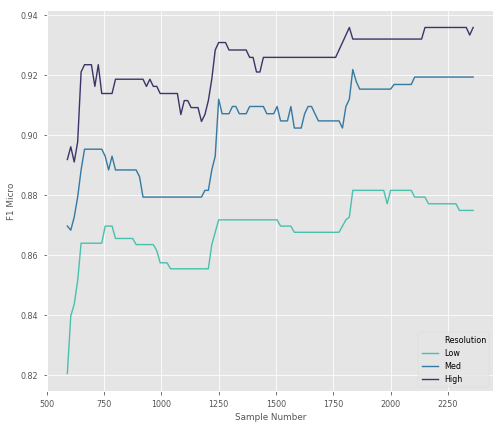

In [25]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="F1 Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_LR)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [26]:
#fig, ax = plt.subplots(figsize=a4_dims)
#ax = sns.lineplot(x="Thresholds", y="Score", hue="Resolution", style="Score Type",
#                  palette=palette_3, legend="full", data=df_plot)
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
#plt.show()

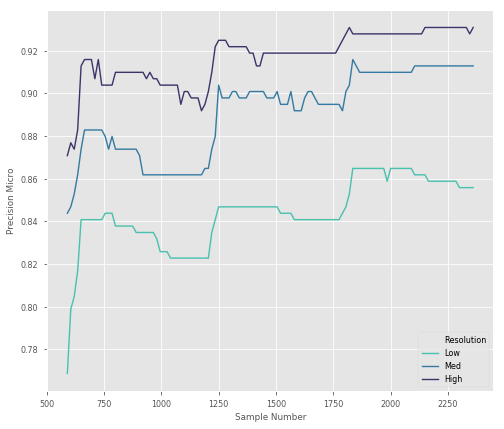

In [27]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="Precision Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_LR)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [28]:
path_LR = './data_augmentation/results/df_LR.csv'
df_plot_LR.to_csv(path_LR, index=True)

In [43]:
grid_C = [i for i in range(-5, 7, 1)]
grid_gamma = [i for i in range(0, 11, 1)]
param_grid_svm_rbf = {'C': [2**i for i in grid_C], 
                      'gamma': np.round([0.1*i for i in grid_gamma], decimals=2)}
print('Parameters:', param_grid_svm_rbf)

Parameters: {'C': [0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64], 'gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}


In [44]:
Precision_micro_low_SVC = np.array([])
Precision_macro_low_SVC = np.array([])
Precision_weighted_low_SVC = np.array([])

Recall_micro_low_SVC = np.array([])
Recall_macro_low_SVC = np.array([])
Recall_weighted_low_SVC = np.array([])

F1_micro_low_SVC = np.array([])
F1_macro_low_SVC = np.array([])
F1_weighted_low_SVC = np.array([])
Sample_Num_low_SVC = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = SVM_rbf_clf(param_grid_svm_rbf, X_train_low_aug[:i], y_train_low_aug[:i].astype(int), X_test_low, y_test_low)
       
    Precision_micro_low_SVC = np.append(Precision_micro_low_SVC, pr_micro)
    Precision_macro_low_SVC = np.append(Precision_macro_low_SVC, pr_macro)
    Precision_weighted_low_SVC = np.append(Precision_weighted_low_SVC, pr_weighted)    
    
    Recall_micro_low_SVC = np.append(Recall_micro_low_SVC, re_micro)
    Recall_macro_low_SVC = np.append(Recall_macro_low_SVC, re_macro)
    Recall_weighted_low_SVC = np.append(Recall_weighted_low_SVC, re_weighted)    
    
    F1_micro_low_SVC = np.append(F1_micro_low_SVC, f1_micro)
    F1_macro_low_SVC = np.append(F1_macro_low_SVC, f1_macro)
    F1_weighted_low_SVC = np.append(F1_weighted_low_SVC, f1_weighted)
    
    Sample_Num_low_SVC = np.append(Sample_Num_low_SVC, len(y_train_low_aug[:i]))
    
    print((i-590)/step)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0


In [45]:
df_plot_low_SVC = pd.DataFrame()
df_plot_low_SVC['Sample Number'] = Sample_Num_low_SVC

df_plot_low_SVC['Precision Micro'] = Precision_micro_low_SVC
df_plot_low_SVC['Precision Macro'] = Precision_macro_low_SVC
df_plot_low_SVC['Precision Weighted'] = Precision_weighted_low_SVC

df_plot_low_SVC['Recall Micro'] = Recall_micro_low_SVC
df_plot_low_SVC['Recall Macro'] = Recall_macro_low_SVC
df_plot_low_SVC['Recall Weighted'] = Recall_weighted_low_SVC

df_plot_low_SVC['F1 Micro'] = F1_micro_low_SVC
df_plot_low_SVC['F1 Macro'] = F1_macro_low_SVC
df_plot_low_SVC['F1 Weighted'] = F1_weighted_low_SVC

df_plot_low_SVC['Resolution'] = 'Low'

In [46]:
Precision_micro_med_SVC = np.array([])
Precision_macro_med_SVC = np.array([])
Precision_weighted_med_SVC = np.array([])

Recall_micro_med_SVC = np.array([])
Recall_macro_med_SVC = np.array([])
Recall_weighted_med_SVC = np.array([])

F1_micro_med_SVC = np.array([])
F1_macro_med_SVC = np.array([])
F1_weighted_med_SVC = np.array([])
Sample_Num_med_SVC = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = SVM_rbf_clf(param_grid_svm_rbf, X_train_med_aug[:i], y_train_med_aug[:i].astype(int), X_test_med, y_test_med)
       
    Precision_micro_med_SVC = np.append(Precision_micro_med_SVC, pr_micro)
    Precision_macro_med_SVC = np.append(Precision_macro_med_SVC, pr_macro)
    Precision_weighted_med_SVC = np.append(Precision_weighted_med_SVC, pr_weighted)    
    
    Recall_micro_med_SVC = np.append(Recall_micro_med_SVC, re_micro)
    Recall_macro_med_SVC = np.append(Recall_macro_med_SVC, re_macro)
    Recall_weighted_med_SVC = np.append(Recall_weighted_med_SVC, re_weighted)    
    
    F1_micro_med_SVC = np.append(F1_micro_med_SVC, f1_micro)
    F1_macro_med_SVC = np.append(F1_macro_med_SVC, f1_macro)
    F1_weighted_med_SVC = np.append(F1_weighted_med_SVC, f1_weighted)
    
    Sample_Num_med_SVC = np.append(Sample_Num_med_SVC, len(y_train_med_aug[:i]))
    
    print((i-590)/step)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0


In [47]:
df_plot_med_SVC = pd.DataFrame()
df_plot_med_SVC['Sample Number'] = Sample_Num_med_SVC

df_plot_med_SVC['Precision Micro'] = Precision_micro_med_SVC
df_plot_med_SVC['Precision Macro'] = Precision_macro_med_SVC
df_plot_med_SVC['Precision Weighted'] = Precision_weighted_med_SVC

df_plot_med_SVC['Recall Micro'] = Recall_micro_med_SVC
df_plot_med_SVC['Recall Macro'] = Recall_macro_med_SVC
df_plot_med_SVC['Recall Weighted'] = Recall_weighted_med_SVC

df_plot_med_SVC['F1 Micro'] = F1_micro_med_SVC
df_plot_med_SVC['F1 Macro'] = F1_macro_med_SVC
df_plot_med_SVC['F1 Weighted'] = F1_weighted_med_SVC

df_plot_med_SVC['Resolution'] = 'Med'

In [48]:
Precision_micro_high_SVC = np.array([])
Precision_macro_high_SVC = np.array([])
Precision_weighted_high_SVC = np.array([])

Recall_micro_high_SVC = np.array([])
Recall_macro_high_SVC = np.array([])
Recall_weighted_high_SVC = np.array([])

F1_micro_high_SVC = np.array([])
F1_macro_high_SVC = np.array([])
F1_weighted_high_SVC = np.array([])
Sample_Num_high_SVC = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = SVM_rbf_clf(param_grid_svm_rbf, X_train_high_aug[:i], y_train_high_aug[:i].astype(int), X_test_high, y_test_high)
       
    Precision_micro_high_SVC = np.append(Precision_micro_high_SVC, pr_micro)
    Precision_macro_high_SVC = np.append(Precision_macro_high_SVC, pr_macro)
    Precision_weighted_high_SVC = np.append(Precision_weighted_high_SVC, pr_weighted)    
    
    Recall_micro_high_SVC = np.append(Recall_micro_high_SVC, re_micro)
    Recall_macro_high_SVC = np.append(Recall_macro_high_SVC, re_macro)
    Recall_weighted_high_SVC = np.append(Recall_weighted_high_SVC, re_weighted)    
    
    F1_micro_high_SVC = np.append(F1_micro_high_SVC, f1_micro)
    F1_macro_high_SVC = np.append(F1_macro_high_SVC, f1_macro)
    F1_weighted_high_SVC = np.append(F1_weighted_high_SVC, f1_weighted)
    
    Sample_Num_high_SVC = np.append(Sample_Num_high_SVC, len(y_train_high_aug[:i]))
    
    print((i-590)/step)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0


In [49]:
df_plot_high_SVC = pd.DataFrame()
df_plot_high_SVC['Sample Number'] = Sample_Num_high_SVC

df_plot_high_SVC['Precision Micro'] = Precision_micro_high_SVC
df_plot_high_SVC['Precision Macro'] = Precision_macro_high_SVC
df_plot_high_SVC['Precision Weighted'] = Precision_weighted_high_SVC

df_plot_high_SVC['Recall Micro'] = Recall_micro_high_SVC
df_plot_high_SVC['Recall Macro'] = Recall_macro_high_SVC
df_plot_high_SVC['Recall Weighted'] = Recall_weighted_high_SVC

df_plot_high_SVC['F1 Micro'] = F1_micro_high_SVC
df_plot_high_SVC['F1 Macro'] = F1_macro_high_SVC
df_plot_high_SVC['F1 Weighted'] = F1_weighted_high_SVC

df_plot_high_SVC['Resolution'] = 'High'

In [50]:
df_plot_SVC = df_plot_low_SVC.append(df_plot_med_SVC, ignore_index=True)
df_plot_SVC = df_plot_SVC.append(df_plot_high_SVC, ignore_index=True)

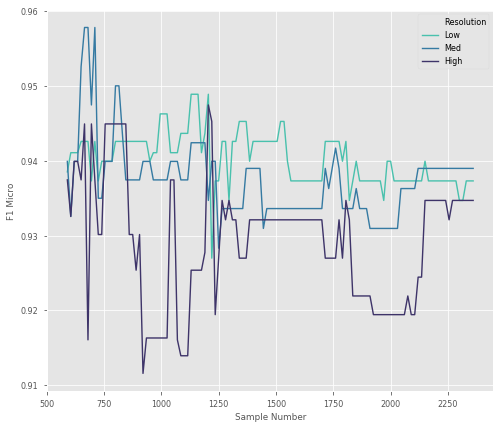

In [51]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="F1 Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_SVC)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()

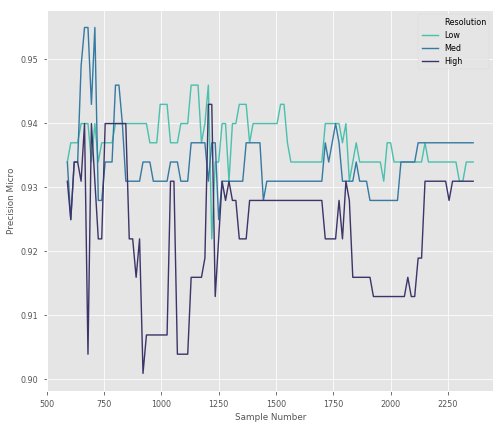

In [53]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="Precision Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_SVC)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [52]:
path_SVC = './data_augmentation/results/df_SVC.csv'
df_plot_SVC.to_csv(path_SVC, index=True)

In [41]:
ii = 0
for i in range(590, 2361, 15):
    ii = ii +1
    
print(ii,'        ', i)    

119          2360


In [16]:
max_features_params_rf = [np.round(10**-1 * i, decimals=2) for i in range(1, 11, 1)]
param_grid_rf = {'n_estimators': [2**i for i in range(2, 12, 1)], 'max_features': max_features_params_rf}
print('Parameters:', param_grid_rf)

Parameters: {'n_estimators': [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048], 'max_features': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}


In [19]:
Precision_micro_low_RF = np.array([])
Precision_macro_low_RF = np.array([])
Precision_weighted_low_RF = np.array([])

Recall_micro_low_RF = np.array([])
Recall_macro_low_RF = np.array([])
Recall_weighted_low_RF = np.array([])

F1_micro_low_RF = np.array([])
F1_macro_low_RF = np.array([])
F1_weighted_low_RF = np.array([])
Sample_Num_low_RF = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = random_forests_clf(param_grid_rf, X_train_low_aug[:i], y_train_low_aug[:i].astype(int), X_test_low, y_test_low)
       
    Precision_micro_low_RF = np.append(Precision_micro_low_RF, pr_micro)
    Precision_macro_low_RF = np.append(Precision_macro_low_RF, pr_macro)
    Precision_weighted_low_RF = np.append(Precision_weighted_low_RF, pr_weighted)    
    
    Recall_micro_low_RF = np.append(Recall_micro_low_RF, re_micro)
    Recall_macro_low_RF = np.append(Recall_macro_low_RF, re_macro)
    Recall_weighted_low_RF = np.append(Recall_weighted_low_RF, re_weighted)    
    
    F1_micro_low_RF = np.append(F1_micro_low_RF, f1_micro)
    F1_macro_low_RF = np.append(F1_macro_low_RF, f1_macro)
    F1_weighted_low_RF = np.append(F1_weighted_low_RF, f1_weighted)
    
    Sample_Num_low_RF = np.append(Sample_Num_low_RF, len(y_train_low_aug[:i]))
    
    print((i-590)/step)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0


In [20]:
df_plot_low_RF = pd.DataFrame()
df_plot_low_RF['Sample Number'] = Sample_Num_low_RF

df_plot_low_RF['Precision Micro'] = Precision_micro_low_RF
df_plot_low_RF['Precision Macro'] = Precision_macro_low_RF
df_plot_low_RF['Precision Weighted'] = Precision_weighted_low_RF

df_plot_low_RF['Recall Micro'] = Recall_micro_low_RF
df_plot_low_RF['Recall Macro'] = Recall_macro_low_RF
df_plot_low_RF['Recall Weighted'] = Recall_weighted_low_RF

df_plot_low_RF['F1 Micro'] = F1_micro_low_RF
df_plot_low_RF['F1 Macro'] = F1_macro_low_RF
df_plot_low_RF['F1 Weighted'] = F1_weighted_low_RF

df_plot_low_RF['Resolution'] = 'Low'

In [21]:
Precision_micro_med_RF = np.array([])
Precision_macro_med_RF = np.array([])
Precision_weighted_med_RF = np.array([])

Recall_micro_med_RF = np.array([])
Recall_macro_med_RF = np.array([])
Recall_weighted_med_RF = np.array([])

F1_micro_med_RF = np.array([])
F1_macro_med_RF = np.array([])
F1_weighted_med_RF = np.array([])
Sample_Num_med_RF = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = random_forests_clf(param_grid_rf, X_train_med_aug[:i], y_train_med_aug[:i].astype(int), X_test_med, y_test_med)
       
    Precision_micro_med_RF = np.append(Precision_micro_med_RF, pr_micro)
    Precision_macro_med_RF = np.append(Precision_macro_med_RF, pr_macro)
    Precision_weighted_med_RF = np.append(Precision_weighted_med_RF, pr_weighted)    
    
    Recall_micro_med_RF = np.append(Recall_micro_med_RF, re_micro)
    Recall_macro_med_RF = np.append(Recall_macro_med_RF, re_macro)
    Recall_weighted_med_RF = np.append(Recall_weighted_med_RF, re_weighted)    
    
    F1_micro_med_RF = np.append(F1_micro_med_RF, f1_micro)
    F1_macro_med_RF = np.append(F1_macro_med_RF, f1_macro)
    F1_weighted_med_RF = np.append(F1_weighted_med_RF, f1_weighted)
    
    Sample_Num_med_RF = np.append(Sample_Num_med_RF, len(y_train_med_aug[:i]))
    
    print((i-590)/step)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0


In [22]:
df_plot_med_RF = pd.DataFrame()
df_plot_med_RF['Sample Number'] = Sample_Num_med_RF

df_plot_med_RF['Precision Micro'] = Precision_micro_med_RF
df_plot_med_RF['Precision Macro'] = Precision_macro_med_RF
df_plot_med_RF['Precision Weighted'] = Precision_weighted_med_RF

df_plot_med_RF['Recall Micro'] = Recall_micro_med_RF
df_plot_med_RF['Recall Macro'] = Recall_macro_med_RF
df_plot_med_RF['Recall Weighted'] = Recall_weighted_med_RF

df_plot_med_RF['F1 Micro'] = F1_micro_med_RF
df_plot_med_RF['F1 Macro'] = F1_macro_med_RF
df_plot_med_RF['F1 Weighted'] = F1_weighted_med_RF

df_plot_med_RF['Resolution'] = 'Med'

In [23]:
Precision_micro_high_RF = np.array([])
Precision_macro_high_RF = np.array([])
Precision_weighted_high_RF = np.array([])

Recall_micro_high_RF = np.array([])
Recall_macro_high_RF = np.array([])
Recall_weighted_high_RF = np.array([])

F1_micro_high_RF = np.array([])
F1_macro_high_RF = np.array([])
F1_weighted_high_RF = np.array([])
Sample_Num_high_RF = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = random_forests_clf(param_grid_rf, X_train_high_aug[:i], y_train_high_aug[:i].astype(int), X_test_high, y_test_high)
       
    Precision_micro_high_RF = np.append(Precision_micro_high_RF, pr_micro)
    Precision_macro_high_RF = np.append(Precision_macro_high_RF, pr_macro)
    Precision_weighted_high_RF = np.append(Precision_weighted_high_RF, pr_weighted)    
    
    Recall_micro_high_RF = np.append(Recall_micro_high_RF, re_micro)
    Recall_macro_high_RF = np.append(Recall_macro_high_RF, re_macro)
    Recall_weighted_high_RF = np.append(Recall_weighted_high_RF, re_weighted)    
    
    F1_micro_high_RF = np.append(F1_micro_high_RF, f1_micro)
    F1_macro_high_RF = np.append(F1_macro_high_RF, f1_macro)
    F1_weighted_high_RF = np.append(F1_weighted_high_RF, f1_weighted)
    
    Sample_Num_high_RF = np.append(Sample_Num_high_RF, len(y_train_high_aug[:i]))
    
    print((i-590)/step)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.0
56.0
57.0
58.0
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
100.0
101.0
102.0
103.0
104.0
105.0
106.0
107.0
108.0
109.0
110.0
111.0
112.0
113.0
114.0
115.0
116.0
117.0
118.0


In [24]:
df_plot_high_RF = pd.DataFrame()
df_plot_high_RF['Sample Number'] = Sample_Num_high_RF

df_plot_high_RF['Precision Micro'] = Precision_micro_high_RF
df_plot_high_RF['Precision Macro'] = Precision_macro_high_RF
df_plot_high_RF['Precision Weighted'] = Precision_weighted_high_RF

df_plot_high_RF['Recall Micro'] = Recall_micro_high_RF
df_plot_high_RF['Recall Macro'] = Recall_macro_high_RF
df_plot_high_RF['Recall Weighted'] = Recall_weighted_high_RF

df_plot_high_RF['F1 Micro'] = F1_micro_high_RF
df_plot_high_RF['F1 Macro'] = F1_macro_high_RF
df_plot_high_RF['F1 Weighted'] = F1_weighted_high_RF

df_plot_high_RF['Resolution'] = 'High'

In [25]:
df_plot_RF = df_plot_low_RF.append(df_plot_med_RF, ignore_index=True)
df_plot_RF = df_plot_RF.append(df_plot_high_RF, ignore_index=True)

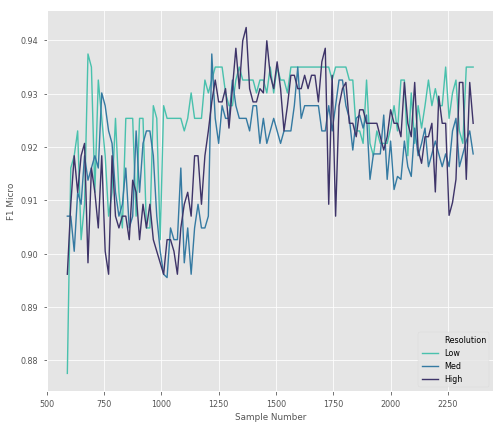

In [30]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="F1 Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_RF)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [27]:
path_RF = './data_augmentation/results/df_RF.csv'
df_plot_RF.to_csv(path_RF, index=True)

In [ ]:
param_grid_mlp = {'alpha': [np.round(10**-1/4 * i, decimals=2) for i in range(1, 11, 1)], 
                  'hidden_layer_sizes': [2**i for i in range(2, 12, 1)]}
print('Parameters:', param_grid_mlp)

In [ ]:
Precision_micro_low_MLP = np.array([])
Precision_macro_low_MLP = np.array([])
Precision_weighted_low_MLP = np.array([])

Recall_micro_low_MLP = np.array([])
Recall_macro_low_MLP = np.array([])
Recall_weighted_low_MLP = np.array([])

F1_micro_low_MLP = np.array([])
F1_macro_low_MLP = np.array([])
F1_weighted_low_MLP = np.array([])
Sample_Num_low_MLP = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = mlp_clf(param_grid_mlp, X_train_low_aug[:i], y_train_low_aug[:i].astype(int), X_test_low, y_test_low)
       
    Precision_micro_low_MLP = np.append(Precision_micro_low_MLP, pr_micro)
    Precision_macro_low_MLP = np.append(Precision_macro_low_MLP, pr_macro)
    Precision_weighted_low_MLP = np.append(Precision_weighted_low_MLP, pr_weighted)    
    
    Recall_micro_low_MLP = np.append(Recall_micro_low_MLP, re_micro)
    Recall_macro_low_MLP = np.append(Recall_macro_low_MLP, re_macro)
    Recall_weighted_low_MLP = np.append(Recall_weighted_low_MLP, re_weighted)    
    
    F1_micro_low_MLP = np.append(F1_micro_low_MLP, f1_micro)
    F1_macro_low_MLP = np.append(F1_macro_low_MLP, f1_macro)
    F1_weighted_low_MLP = np.append(F1_weighted_low_MLP, f1_weighted)
    
    Sample_Num_low_MLP = np.append(Sample_Num_low_MLP, len(y_train_low_aug[:i]))
    
    print((i-590)/step)

In [ ]:
df_plot_low_MLP = pd.DataFrame()
df_plot_low_MLP['Sample Number'] = Sample_Num_low_MLP

df_plot_low_MLP['Precision Micro'] = Precision_micro_low_MLP
df_plot_low_MLP['Precision Macro'] = Precision_macro_low_MLP
df_plot_low_MLP['Precision Weighted'] = Precision_weighted_low_MLP

df_plot_low_MLP['Recall Micro'] = Recall_micro_low_MLP
df_plot_low_MLP['Recall Macro'] = Recall_macro_low_MLP
df_plot_low_MLP['Recall Weighted'] = Recall_weighted_low_MLP

df_plot_low_MLP['F1 Micro'] = F1_micro_low_MLP
df_plot_low_MLP['F1 Macro'] = F1_macro_low_MLP
df_plot_low_MLP['F1 Weighted'] = F1_weighted_low_MLP

df_plot_low_MLP['Resolution'] = 'Low'

In [ ]:
Precision_micro_med_MLP = np.array([])
Precision_macro_med_MLP = np.array([])
Precision_weighted_med_MLP = np.array([])

Recall_micro_med_MLP = np.array([])
Recall_macro_med_MLP = np.array([])
Recall_weighted_med_MLP = np.array([])

F1_micro_med_MLP = np.array([])
F1_macro_med_MLP = np.array([])
F1_weighted_med_MLP = np.array([])
Sample_Num_med_MLP = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = mlp_clf(param_grid_mlp, X_train_med_aug[:i], y_train_med_aug[:i].astype(int), X_test_med, y_test_med)
       
    Precision_micro_med_MLP = np.append(Precision_micro_med_MLP, pr_micro)
    Precision_macro_med_MLP = np.append(Precision_macro_med_MLP, pr_macro)
    Precision_weighted_med_MLP = np.append(Precision_weighted_med_MLP, pr_weighted)    
    
    Recall_micro_med_MLP = np.append(Recall_micro_med_MLP, re_micro)
    Recall_macro_med_MLP = np.append(Recall_macro_med_MLP, re_macro)
    Recall_weighted_med_MLP = np.append(Recall_weighted_med_MLP, re_weighted)    
    
    F1_micro_med_MLP = np.append(F1_micro_med_MLP, f1_micro)
    F1_macro_med_MLP = np.append(F1_macro_med_MLP, f1_macro)
    F1_weighted_med_MLP = np.append(F1_weighted_med_MLP, f1_weighted)
    
    Sample_Num_med_MLP = np.append(Sample_Num_med_MLP, len(y_train_med_aug[:i]))
    
    print((i-590)/step)

In [ ]:
df_plot_Med_MLP = pd.DataFrame()
df_plot_Med_MLP['Sample Number'] = Sample_Num_Med_MLP

df_plot_Med_MLP['Precision Micro'] = Precision_micro_Med_MLP
df_plot_Med_MLP['Precision Macro'] = Precision_macro_Med_MLP
df_plot_Med_MLP['Precision Weighted'] = Precision_weighted_Med_MLP

df_plot_Med_MLP['Recall Micro'] = Recall_micro_Med_MLP
df_plot_Med_MLP['Recall Macro'] = Recall_macro_Med_MLP
df_plot_Med_MLP['Recall Weighted'] = Recall_weighted_Med_MLP

df_plot_Med_MLP['F1 Micro'] = F1_micro_Med_MLP
df_plot_Med_MLP['F1 Macro'] = F1_macro_Med_MLP
df_plot_Med_MLP['F1 Weighted'] = F1_weighted_Med_MLP

df_plot_Med_MLP['Resolution'] = 'Med'

In [ ]:
Precision_micro_high_MLP = np.array([])
Precision_macro_high_MLP = np.array([])
Precision_weighted_high_MLP = np.array([])

Recall_micro_high_MLP = np.array([])
Recall_macro_high_MLP = np.array([])
Recall_weighted_high_MLP = np.array([])

F1_micro_high_MLP = np.array([])
F1_macro_high_MLP = np.array([])
F1_weighted_high_MLP = np.array([])
Sample_Num_high_MLP = np.array([])

for i in range(590, 2361, step):
    
    pr_micro, pr_macro, pr_weighted, re_micro, re_macro, re_weighted, f1_micro, f1_macro, f1_weighted = mlp_clf(param_grid_mlp, X_train_high_aug[:i], y_train_high_aug[:i].astype(int), X_test_high, y_test_high)
       
    Precision_micro_high_MLP = np.append(Precision_micro_high_MLP, pr_micro)
    Precision_macro_high_MLP = np.append(Precision_macro_high_MLP, pr_macro)
    Precision_weighted_high_MLP = np.append(Precision_weighted_high_MLP, pr_weighted)    
    
    Recall_micro_high_MLP = np.append(Recall_micro_high_MLP, re_micro)
    Recall_macro_high_MLP = np.append(Recall_macro_high_MLP, re_macro)
    Recall_weighted_high_MLP = np.append(Recall_weighted_high_MLP, re_weighted)    
    
    F1_micro_high_MLP = np.append(F1_micro_high_MLP, f1_micro)
    F1_macro_high_MLP = np.append(F1_macro_high_MLP, f1_macro)
    F1_weighted_high_MLP = np.append(F1_weighted_high_MLP, f1_weighted)
    
    Sample_Num_high_MLP = np.append(Sample_Num_high_MLP, len(y_train_high_aug[:i]))
    
    print((i-590)/step)

In [ ]:
df_plot_high_MLP = pd.DataFrame()
df_plot_high_MLP['Sample Number'] = Sample_Num_high_MLP

df_plot_high_MLP['Precision Micro'] = Precision_micro_high_MLP
df_plot_high_MLP['Precision Macro'] = Precision_macro_high_MLP
df_plot_high_MLP['Precision Weighted'] = Precision_weighted_high_MLP

df_plot_high_MLP['Recall Micro'] = Recall_micro_high_MLP
df_plot_high_MLP['Recall Macro'] = Recall_macro_high_MLP
df_plot_high_MLP['Recall Weighted'] = Recall_weighted_high_MLP

df_plot_high_MLP['F1 Micro'] = F1_micro_high_MLP
df_plot_high_MLP['F1 Macro'] = F1_macro_high_MLP
df_plot_high_MLP['F1 Weighted'] = F1_weighted_high_MLP

df_plot_high_MLP['Resolution'] = 'High'

In [ ]:
df_plot_MLP = df_plot_low_MLP.append(df_plot_med_MLP, ignore_index=True)
df_plot_MLP = df_plot_MLP.append(df_plot_high_MLP, ignore_index=True)

In [ ]:
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.lineplot(x="Sample Number", y="F1 Micro", legend="full", hue="Resolution", palette=palette_3,
                  
                  
                  data=df_plot_MLP)
#sns.scatterplot
#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#ax.set_xlim(-2.5,3.5)
#plt.savefig('./results/graphics/ST_LR.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
path_MLP = './data_augmentation/results/df_MLP.csv'
df_plot_MLP.to_csv(path_MLP, index=True)

## Workflow
Note: utility functions are stored in the module soundclim_utilities.py

Compile train dataset. [1_compile_dataset.py](1_compile_dataset.py)
- Segment and characterise the regions of interest.
- Select ROIs to manually annotate and export comma separated file.
- Format the training dataset with associted metadata as an RData file.
- Mix a single audio file with all ROIs and export as wav file with text annotation file.

Manually annotate ROIs using Audacity.
- Export annotation and match with features. [2_export_features_mannot_tocsv](2_export_features_mannot_tocsv)

Tune statistical classifier and deploy.
- Train and tune multiple statistical classifiers. [3_tune_clf_simple.py](3_tune_clf_simple.py)
- Predict and validate using test dataset. [4_batch_predict_rois.py](4_batch_predict_rois.py)






## Workflow

* [1_detection_and_feature_extraction.ipynb](1_detection_and_feature_extraction.ipynb) Detection of regions of interest and extraction of characteristics from regions of interest. 


* [2_data_processing.ipynb](2_data_processing.ipynb) The regions of interest are labeled and the training and test sets are created.


* [3_models_training.ipynb](3_models_training.ipynb) Supervised learning models are trained. It's found the hyperparameters of the models: logistic regression, support vector machine, random forest, multilayer perceptron.


* [4_data_analysis.ipynb](4_data_analysis.ipynb) Visualize and analyze data.


* [5_data_augmentation.ipynb](5_data_augmentation.ipynb) Generate the files with background sound.


* [6_data_augmentation_features_extraction.ipynb](6_data_augmentation_features_extraction.ipynb) Extract the characteristics of the augmented data.


* [7_data_augmentation_data_processing.ipynb](7_data_augmentation_data_processing.ipynb) The regions of interest of augmented data are labeled and the training and test sets are created.


* [8_data_augmentation_models_training.ipynb](8_data_augmentation_models_training.ipynb) Supervised learning models are trained.


* [9_data_analysis_data_augmentation.ipynb](9_data_analysis_data_augmentation.ipynb) Visualize and analyze data.


